In [1]:
import os
from utilities import preprocessDICOM
import numpy as np

In [2]:
path2dcm = 'D:\\imagedata\\Esophagus_DICOM_211Pt\\'
outputdir = 'D:\\imagedata\\Eso_Numpy_NoZeroCent_211\\'

In [3]:
pathlist = []
RTstrfiles=[]
for x,_,_ in os.walk(path2dcm):
    pathlist.append(x)
pathlist.pop(0)
len(pathlist)

211

In [5]:
DoneFiles = []
NotDoneFiles = []
for k in range(len(pathlist)):
    path2Rtstr = []
    for i in os.listdir(pathlist[k]):
        if 'RS' in i:
            path2Rtstr.append(i)
    RTstrPath = os.path.join(pathlist[k],path2Rtstr[0])
    DICOMpath = pathlist[k]
    fname = outputdir + RTstrPath[-10:][:6] + '.npy'
    try:
        img = preprocessDICOM.preprocess(DICOMpath,RTstrPath,zero=False)
    except:
        print(f'Could not Convert -- {fname}')
        NotDoneFiles.append(fname)
    np.save(fname,img)
    print(f'{fname} Cropped Successfully')
    DoneFiles.append(fname)

Structure(gtv_1) not found. Found Match points Structure
D:\imagedata\Eso_Numpy_NoZeroCent_211\260194.npy Cropped Successfully


In [17]:
from utilities import utilities

In [53]:
IDs = []
for k in range(len(pathlist)):
    for i in os.listdir(pathlist[k]):
        if 'RS' in i:
            IDs.append(int(i[3:9]))
    

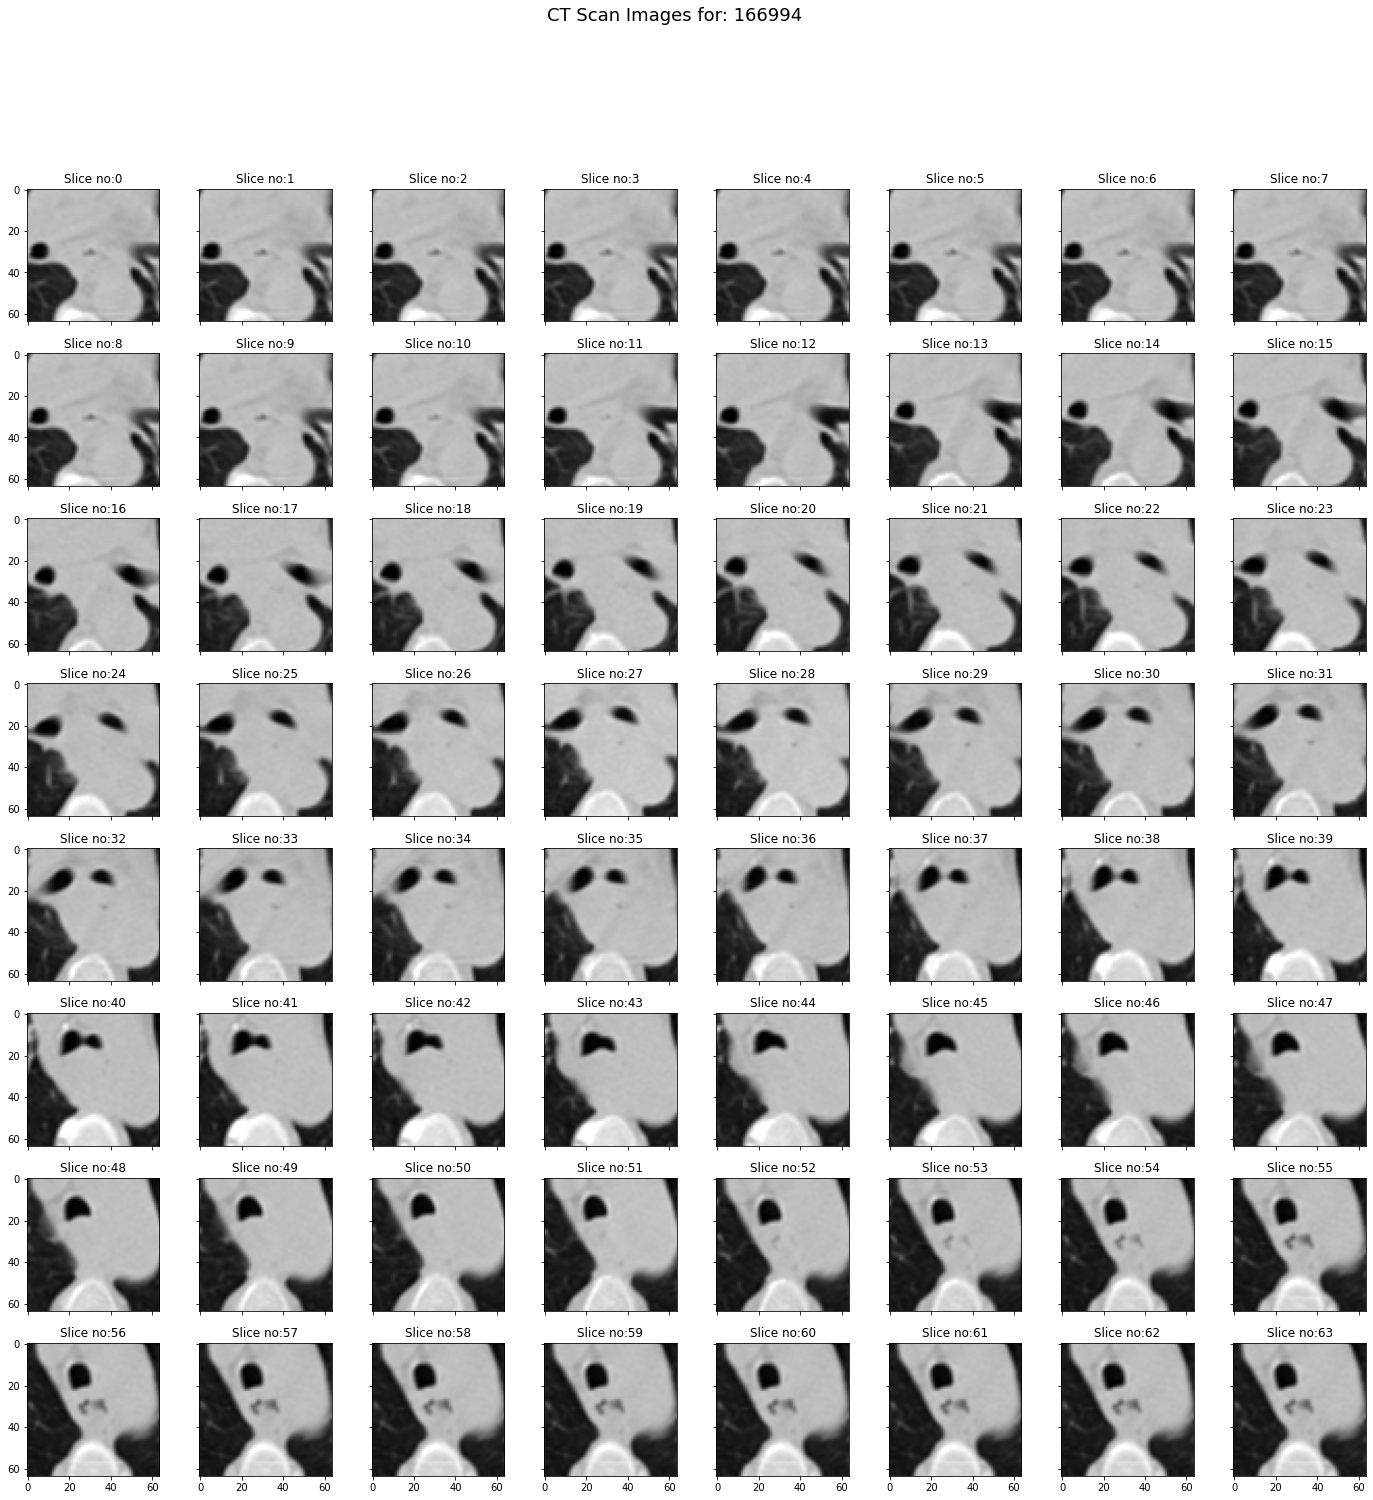

In [94]:
ID = IDs[50]
utilities.check_numpy_images(ID,img_path='D:\\imagedata\\Eso_Numpy_NoZeroCent_211\\',rotate=False)

# Issues with Scans

- Oral Contrast - 129143, 153203
- Oral Contrast - 146062, 150224